# Image filtering

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn import preprocessing

## Model saver

In [2]:
class ModelSaver:
    def __init__(self, name = 'model', model = None):
        self.model = model
        self.fileName = name + '.pickle'
    def save(self, model = None):
        if (model == None):
            model = self.model
        pickle.dump(model, open(self.fileName, 'wb'))
    def load(self):
        model = pickle.load(open(self.fileName, 'rb'))
        return model

## Loading up raw data

In [9]:
data = ModelSaver('data/preprocessed').load()
model = ModelSaver('models/model2').load()

In [10]:
training = data['train']
testing = data['test']
validation = data['validation']

xTrain = training['x']
yTrain = training['y']

xTest = testing['x']
yTest = testing['y']

xValidation = validation['x']
yValidation = validation['y']

labels = data['labels']

In [12]:
def showImage(img):
    low, high = np.min(img), np.max(img)
    img = (img - low) / (high - low)
    plt.imshow(img.astype('float32'), cmap=plt.get_cmap('gray_r'))
    plt.show()

Sanity check on training and test data

38 Speed limit (30km/h)


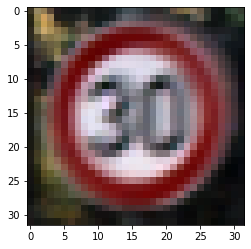

In [37]:
print(yTrain[1], labels[yTrain[0]])
showImage(xTrain[0])

Ahead only


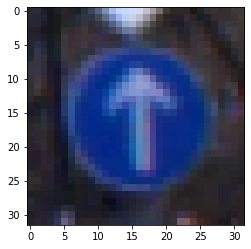

In [14]:
print(labels[yTrain[1000]])
showImage(xTrain[1000])

## Preprocess datasets

In [77]:
def showBadImages(x, y, model):
    topGuesses = np.argsort(model.predict(x), axis=1)[:, ::-1][:, :1]
    success = [ int(y[i] in topGuesses[i]) for i in range(0, len(x)) ]
    success = np.array(success)
    badImages = x[success == 0]
    for img in badImages:
        showImage(img)

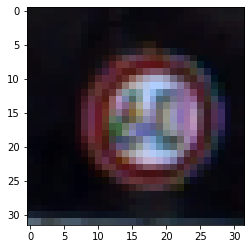

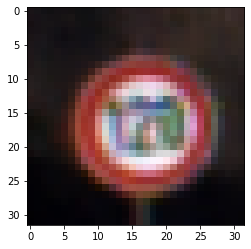

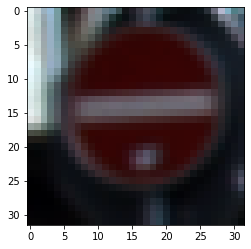

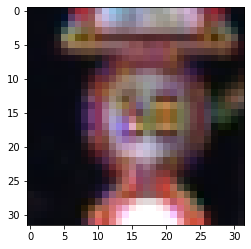

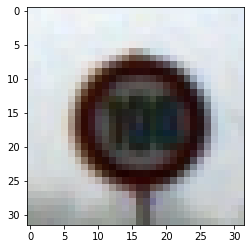

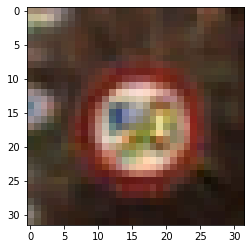

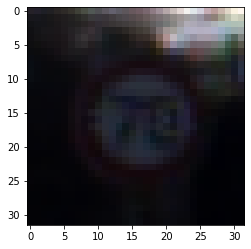

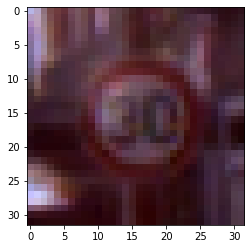

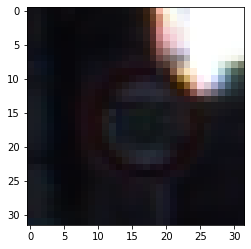

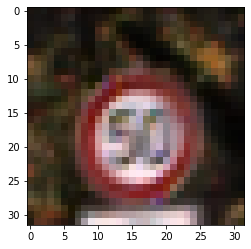

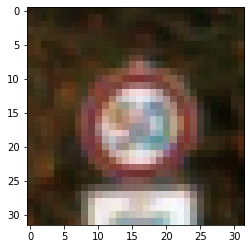

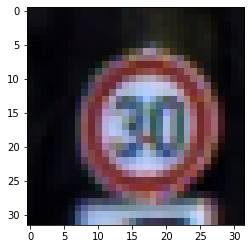

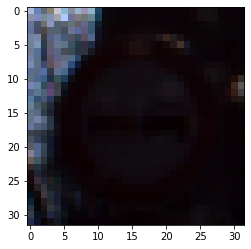

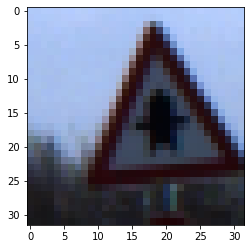

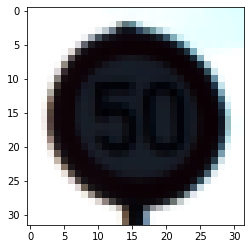

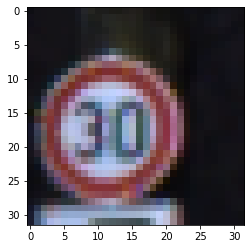

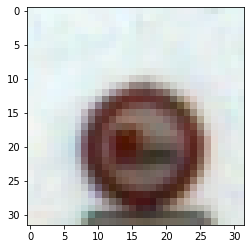

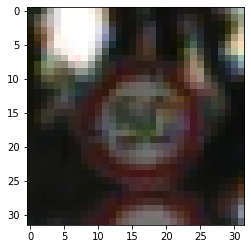

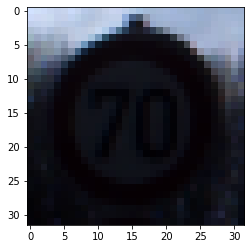

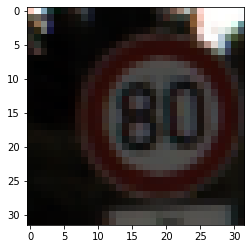

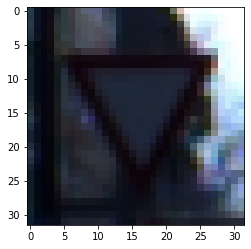

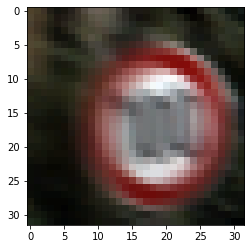

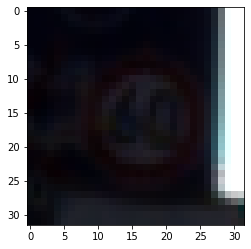

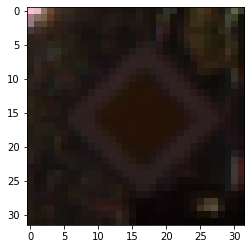

TypeError: object of type 'NoneType' has no len()

In [78]:
showBadImages(xTrain[0:10000], yTrain[0:10000], model)

array([[ 1,  2],
       [38, 34],
       [36, 35],
       [18, 26]])

## Saving preprocessed images

In [12]:
model = { 'train': { 'x': xTrain, 'y': yTrain }, \
         'test': { 'x': xTest, 'y': yTest }, \
         'validation': {'x': xValidation, 'y': yValidation}, \
         'labels': labels
        }

Sanity check

Speed limit (80km/h)


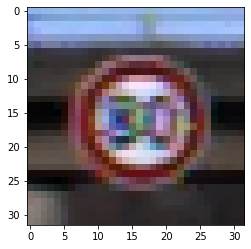

In [13]:
print(model['labels'][model['validation']['y'][200]])
showImage(model['validation']['x'][200])

In [14]:
modelSaver = ModelSaver(model=model, name='data/preprocessed_filtered')
modelSaver.save()

## Load the images

In [15]:
modelSaver = ModelSaver(name='data/preprocessed')
data = modelSaver.load()